In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Reading the data from the given url and defining the column names as given in the description.

index = ["City1","City2","Average Fare","Distance","Average weekly passengers", "market leading airline","market share","Average fare","Low price airline","market share", "price"]

dataframe = pd.read_table("http://users.stat.ufl.edu/~winner/data/airq402.dat", header = None,  sep='\s+' )

dataframe.columns = index

In [23]:
#verifying the data by viewing
dataframe.head(10)

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78


In [24]:
#Validating data
if pd.isnull(dataframe) is True:
    print("There is/are null data in the dataframe")
elif pd.isna(dataframe) is True:
    print("There is/are NA present in the dataframe")

#Verifying if all the numerical datatypes are mapped to correct data types
dataframe.dtypes
dataframe.shape

(1000, 11)

In [25]:
q1 = dataframe.iloc[:,2].quantile(0.25)
q3 = dataframe.iloc[:,2].quantile(0.75)
IQR = q3-q1
mean = dataframe.iloc[:,2].mean()
ulim = mean+1.5*IQR
llim = mean-1.5*IQR

In [26]:
#Removing outliers from the dependent column Average price(3rd column)
print(dataframe.shape)
avgp = dataframe.iloc[:,2]
#print(dataframe[dataframe.iloc[:,2]>ulim].iloc[:,2])
for p in avgp:
    if p>ulim:
        dataframe.drop(index = dataframe[dataframe.iloc[:,2]==p].index[0],inplace = True)
    #print(dataframe[dataframe.iloc[:,2]<llim].iloc[:,2])
    if p<llim:
        dataframe.drop(index = dataframe[dataframe.iloc[:,2]==p].index[0],inplace = True)


print(dataframe.shape)

(1000, 11)
(961, 11)


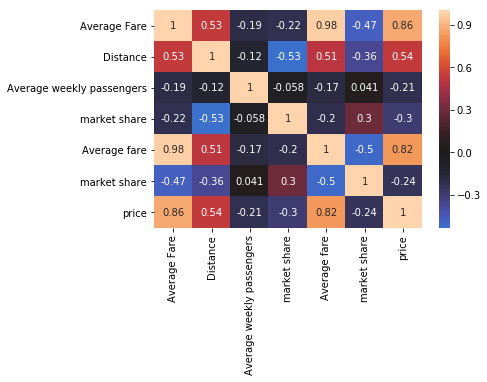

In [27]:
#Dependent variable is "Average Fare". All the other variables are independent. Checking the correlation between the dependent and independent variables throuth heatmap.
correlation = dataframe.corr()
sns.heatmap(correlation, annot = True, center=0)

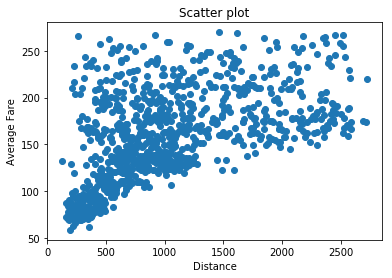

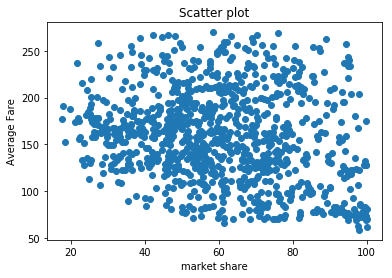

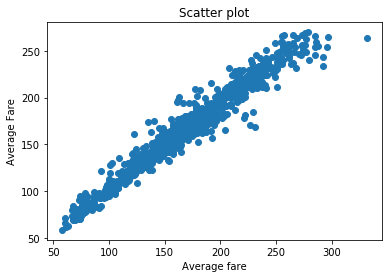

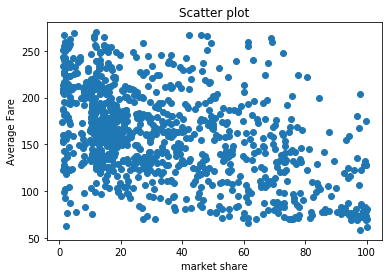

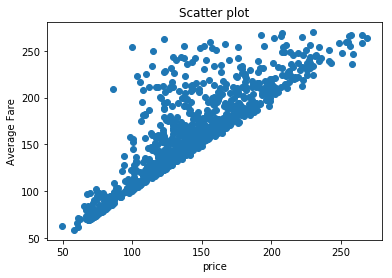

In [28]:
i=0
df = dataframe.drop(columns = ["City1","City2","Low price airline","market leading airline","Average Fare","Average weekly passengers"])
#Validation
if df.applymap(np.isreal) is True:
    print("There is/are no non-numeric data in the dataframe")
#print(len(df.columns))
#if i < len(dataframe.columns):
for i in range(len(df.columns)):
    #if dataframe.iloc[:,i][2].isnumeric() is False:
        #continue
    #else:
    plt.scatter(df.iloc[:,i],dataframe.iloc[:,2])
    plt.title('Scatter plot')
    plt.xlabel(df.columns[i])
    plt.ylabel(dataframe.columns[2])
    plt.show()
        

In [29]:
X = df
y = dataframe.loc[:,"Average Fare"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, train_size = 0.8, random_state=10)

print(X_train.shape)
print(y_train.shape)
#X_test.shape
#y_test.shape

reg = LinearRegression()
reg.fit(X_train,y_train)

(768, 5)
(768,)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
print(reg.coef_)
print(reg.intercept_)

[ 0.00237546  0.05466794  0.73935861 -0.03498594  0.2073572 ]
6.283871659297972


In [31]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

X_test = X_test
Y_pred = reg.predict(X_test)

mse = mean_squared_error(y_test, Y_pred)
rmse = sqrt(mse)

print(rmse)

8.713427333756494


In [58]:
len(Y_pred)

193

In [63]:
y[0]

227.93

In [65]:
Y_pred[0]

212.893912869559

In [59]:
y_predn = Y_pred.reshape(-1,1)
#print(y_predn.size)
y=np.array(y_test)
y_testn = y.reshape(-1,1)
#print(y_testn.size)
r2_valueTest = reg.score(y,Y_pred)

ValueError: Expected 2D array, got 1D array instead:
array=[227.93  77.28 171.31 122.52 154.36 132.92 186.23 239.95 135.62 162.86
 221.07 232.82 165.99 190.76 141.29 208.23 249.15 141.52 187.65  70.61
 150.22 164.99 161.85 173.56 178.31 203.99 155.42 240.12 192.97 238.6
 194.58 222.34 258.85 109.72  78.07 203.36  74.62 223.58 192.69 191.79
  75.44 171.26  83.24 203.29  83.51  94.32  69.03 180.52 182.28 170.57
 168.8  159.97 126.18 126.27 167.56  80.62 122.47 133.52 164.41  85.81
 148.71 231.91 152.25  71.57 157.76 256.12 110.6  211.95 123.99 118.93
 218.63 211.65 140.64 179.6  210.45  80.26 184.89 193.73 242.02 114.24
 158.3  103.89 179.94 101.63 205.77 141.77 232.41 194.68  69.74 265.86
 245.38 161.76 127.37 206.62  97.4  227.12 231.87 200.22  73.7  127.46
 116.26 130.89  82.59  77.23 148.82 174.36 158.7  153.56 258.83 184.75
  72.5  167.34 148.94 250.47 219.31 149.71  86.02 236.84 161.79  73.73
 106.53 131.4  159.74 157.28 174.32 100.92 143.99 193.9   78.41 152.85
  82.23 178.94 162.72  83.09 175.06 177.77 187.61 187.8   99.44  69.99
 185.57 265.27 233.63 198.83 128.97 162.25 125.15 231.15 194.21  97.89
 188.15 207.91 132.52  88.02  80.81 167.07 136.44 223.35 103.82 131.15
 210.99 226.96 104.43  89.36  78.58  71.48 163.7  164.3  226.37  77.76
 234.28 233.3  160.71 254.29 146.93 169.68 206.3  178.21 252.85 127.9
 211.17 163.93 186.83 208.72 170.45 164.94  80.47 234.   139.48 200.44
 161.38 157.84 125.32].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [69]:
u = ((y_testn - y_predn)**2).sum()
v = ((y_test - y_test.mean())**2).sum()
r2 = 1-u/v
r2

0.9728138546878162